<a href="https://colab.research.google.com/github/charlesbest99/ml/blob/main/6-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 차원 축소

다차원 배열에서의 차원 : 배열의 축 개수

1차원 배열에서의 차원 : 원소의 개수

-> 혼란을 피하기 위해 '특성'

특성 많으면?

장점 : 선형모델 성능 향상

단점 : 훈련데이터에 쉽게 과대적합

데이터 용량 증가로 저장공간 부족
      
모델 처리속도 저하

차원축소는 데이터를 가장 잘 나타내는 일부 특성만을 선택하여 데이터 크기 줄이고 지도 학습 모델의 성능 향상

# 주성분 분석(PCA)

대표적 차원 축소 알고리즘

데이터에 있는 분산(퍼져있는 정도)이 큰 방향 찾는 것

= 데이터를 잘 표현하는 어떤 벡터

찾은 벡터는 하나 이기 때문에 주성분도 하나

원래 특성 2개 -> 벡터 1개 (차원 축소)

## PCA 클래스

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-30 02:14:24--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-30 02:14:24--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-30 02:14:25--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [3]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

n_components : 주성분의 개수 지정(필수)

주성분 벡터의 크기는 원본데이터와 동일! (10000)

In [5]:
print(pca.components_.shape)

(50, 10000)


In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

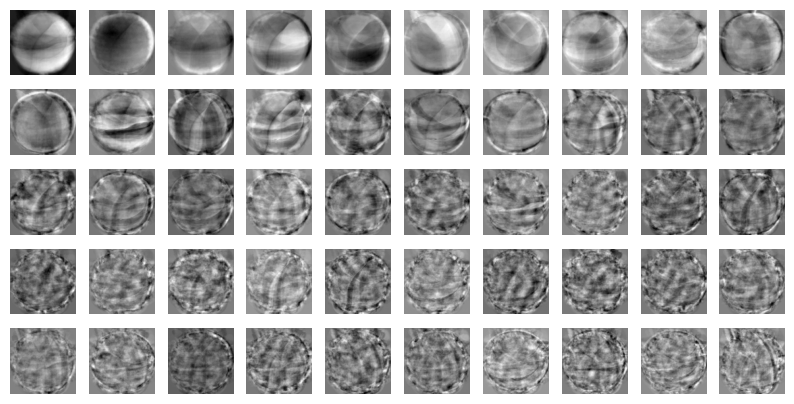

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

원본 데이터에서 분산이 가장 큰 방향을 순서대로 나타냄

찾아낸 주성분을 이용해 원본데이터의 특성을 50으로 줄이기

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)

In [10]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

약간의 손실 발생

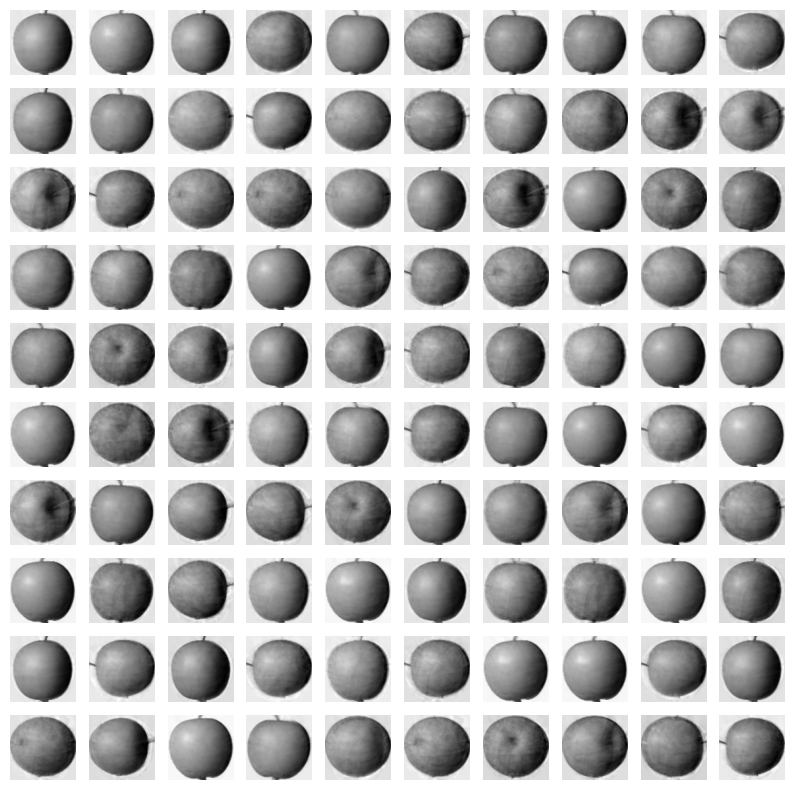

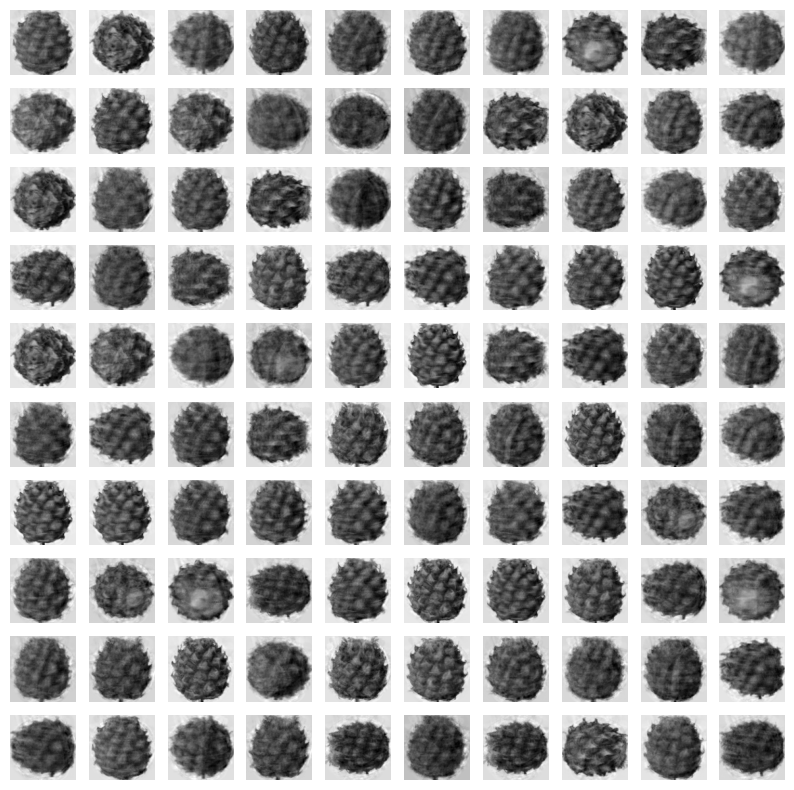

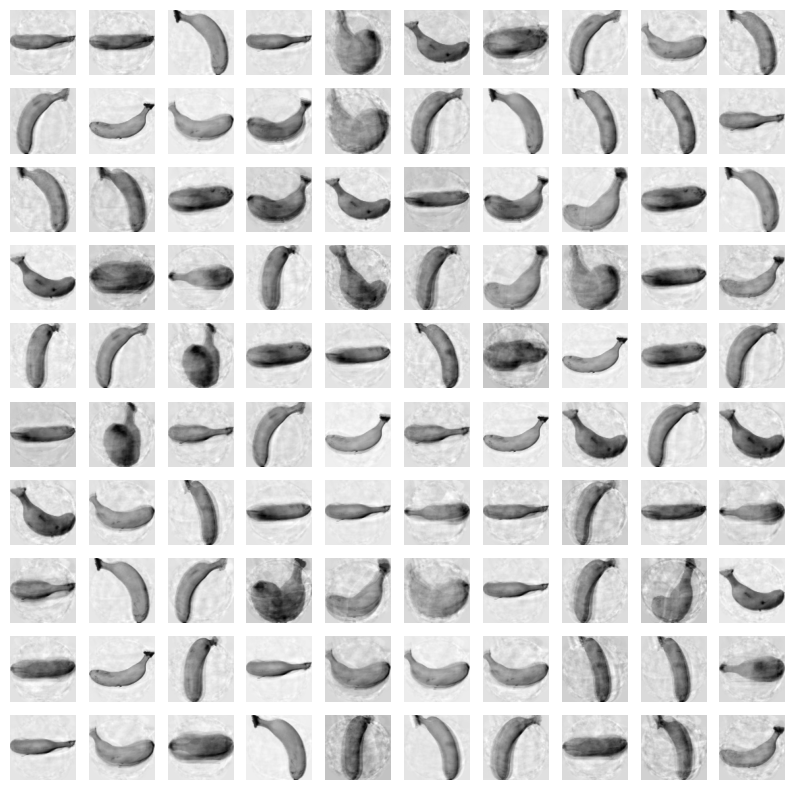

In [13]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [14]:
print(np.sum(pca.explained_variance_ratio_))

0.9215373232686296


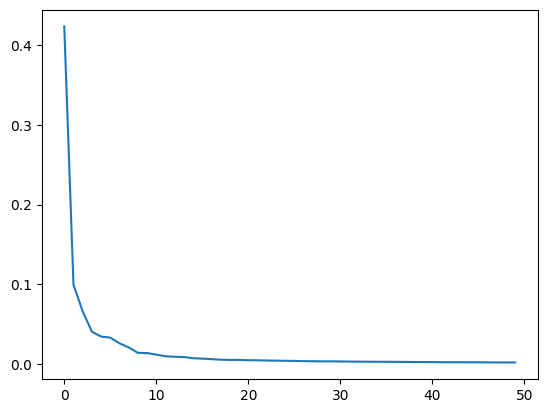

In [15]:
plt.plot(pca.explained_variance_ratio_)

처음 10개의 주성분이 대부분의 분산 표현

## 다른 알고리즘과 함께 사용하기

로지스틱 회귀 모델에 적용

사과=0, 파인애플=1, 바나나=2

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [17]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [18]:
# 원본데이터 사용 경우
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))  # 초 단위

0.9966666666666667
1.6416418552398682


In [19]:
# PCA 축소 데이터 사용 경우
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.024879312515258788


PCA로 차원축소시 저장공간 뿐만 아니라 모델 훈련 속도도 향상

주성분의 개수 대신 분산의 비율로 주성분을 찾을 수 있음

설명된 분산의 50%에 달하는 주성분 찾기

In [20]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

2
0.5229877245800599


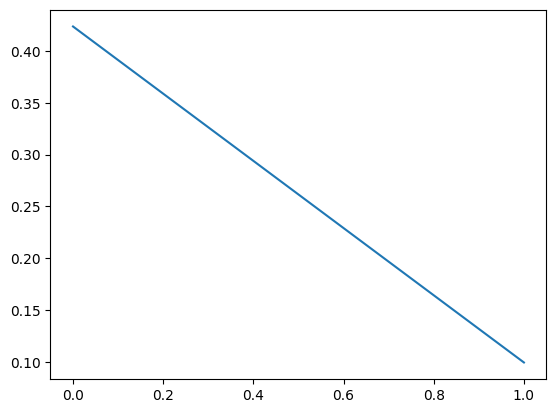

In [28]:
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

원본 데이터 변환

In [22]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


교차검증 수행

In [23]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04933223724365234


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

2개의 특성만으로도 99%의 정확도 달성

차원 축소된 데이터로 k-평균 알고 클러스터 찾기

In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [25]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


원본데이터에 비해 군집 약간의 향상

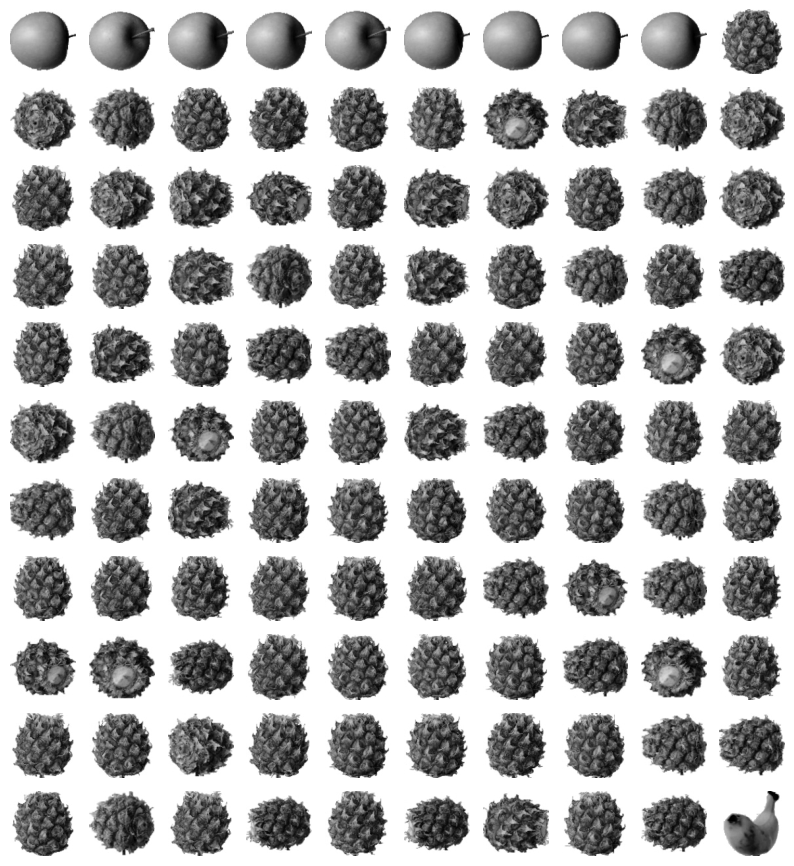

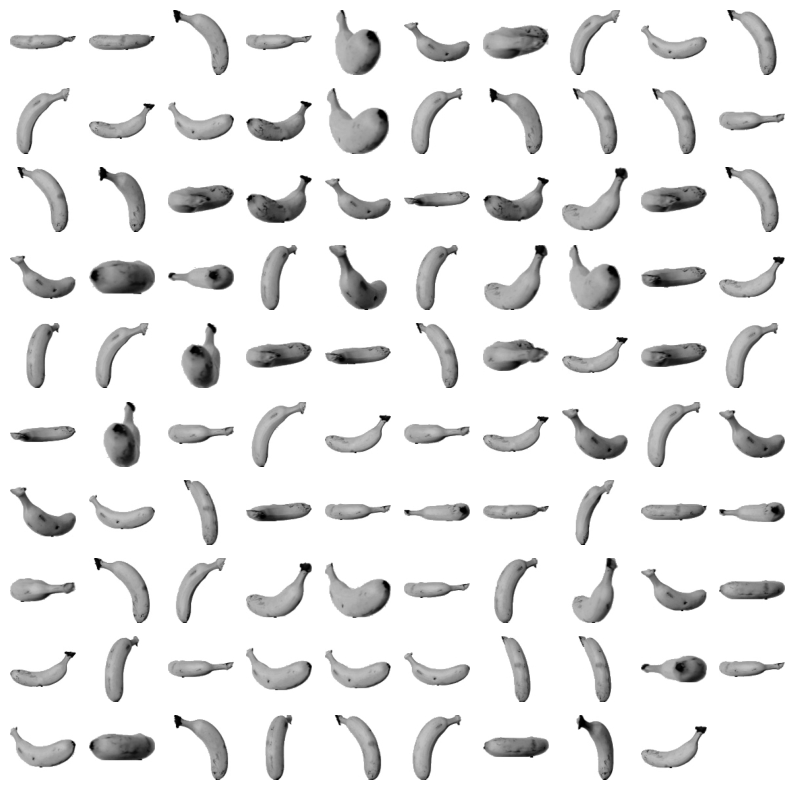

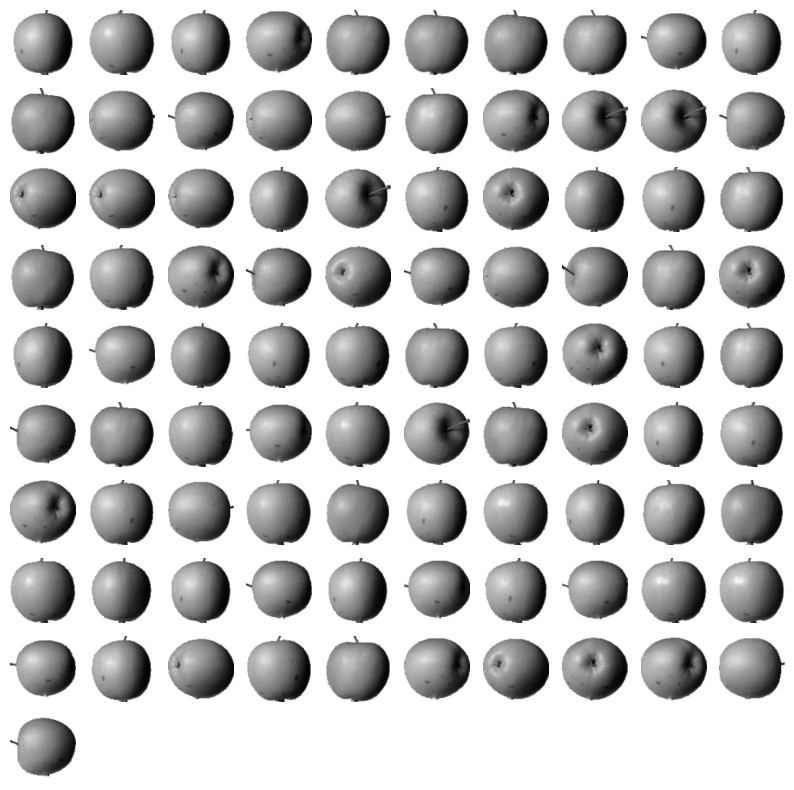

In [26]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

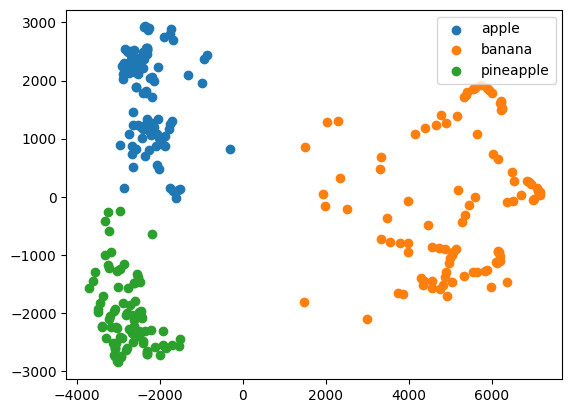

In [27]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

In [ ]:
range = np.arange()

파인애플 클러스터의 경계와 가까운 샘플이 틀림

차원축소 장점

과대적합 억제, 저장공간확보, 모델 처리속도 상승, 모델성능 상승, 시각화 기능